# 노드 투 벡터(Node to Vector)

## node2vec 라이브러리 설치

In [ ]:
!pip install node2vec

## 실행

Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 200.43it/s]


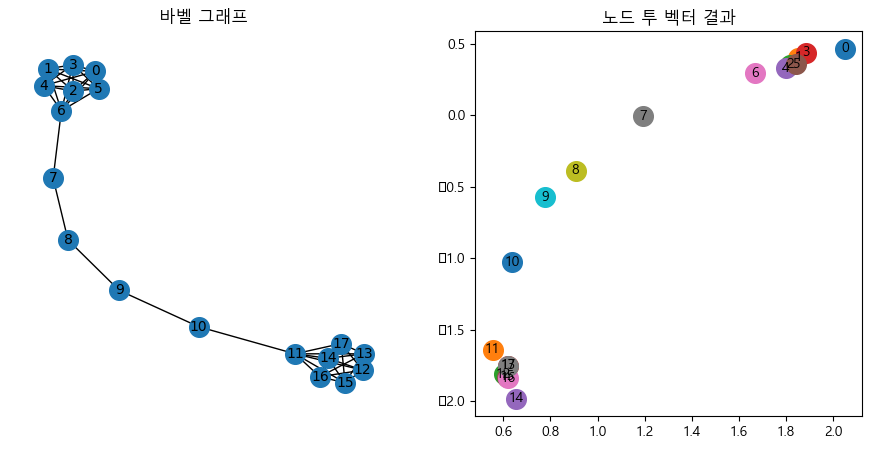

In [23]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")


G = nx.barbell_graph(m1=7, m2=4)  # 바벨 그래프(Barbell graph) 생성
encoder = Node2Vec(G, dimensions=2).fit(window=10)  # 2차원 노드 임베딩(Node-level embedding) 알고리즘

fig, subs = plt.subplots(ncols=2, figsize=(11, 5))

nx.draw(G, with_labels=True, font_size=10, node_size=200, ax=subs[0])  # 바벨 그래프 시각화
subs[0].set_title("바벨 그래프")

for x in G.nodes():
    name = str(x)
    V = encoder.wv.get_vector(name)
    v0, v1 = V[0], V[1]
    
    subs[1].scatter(v0, v1, s=200)
    subs[1].annotate(name, (v0, v1), fontsize=10, ha="center", va="center")
subs[1].set_title("노드 투 벡터 결과")

plt.show()

# 엣지 투 벡터(Edge to Vector)

Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 192.80it/s]


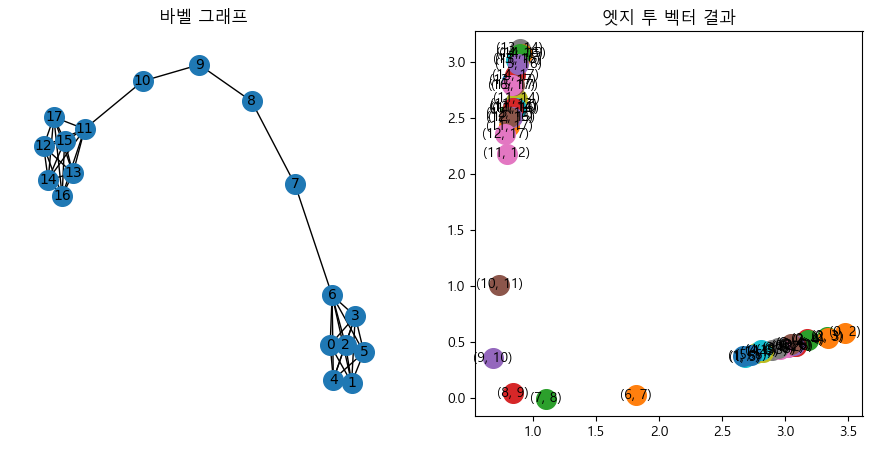

In [1]:
import networkx as nx
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")


G = nx.barbell_graph(m1=7, m2=4)  # 바벨 그래프(Barbell graph) 생성
encoder = Node2Vec(G, dimensions=2).fit(window=10)  # 2차원 노드 임베딩(Node-level embedding) 알고리즘
edge_embedding = HadamardEmbedder(keyed_vectors=encoder.wv)

fig, subs = plt.subplots(ncols=2, figsize=(11, 5))

nx.draw(G, with_labels=True, font_size=10, node_size=200, ax=subs[0])  # 바벨 그래프 시각화
subs[0].set_title("바벨 그래프")

for x in G.edges():
    V = edge_embedding[(str(x[0]), str(x[1]))]
    v0, v1 = V[0], V[1]

    subs[1].scatter(v0, v1, s=200)
    subs[1].annotate(str(x), (v0, v1), fontsize=10, ha="center", va="center")
subs[1].set_title("엣지 투 벡터 결과")

plt.show()

# 그래프 투 벡터(Graph to Vector)

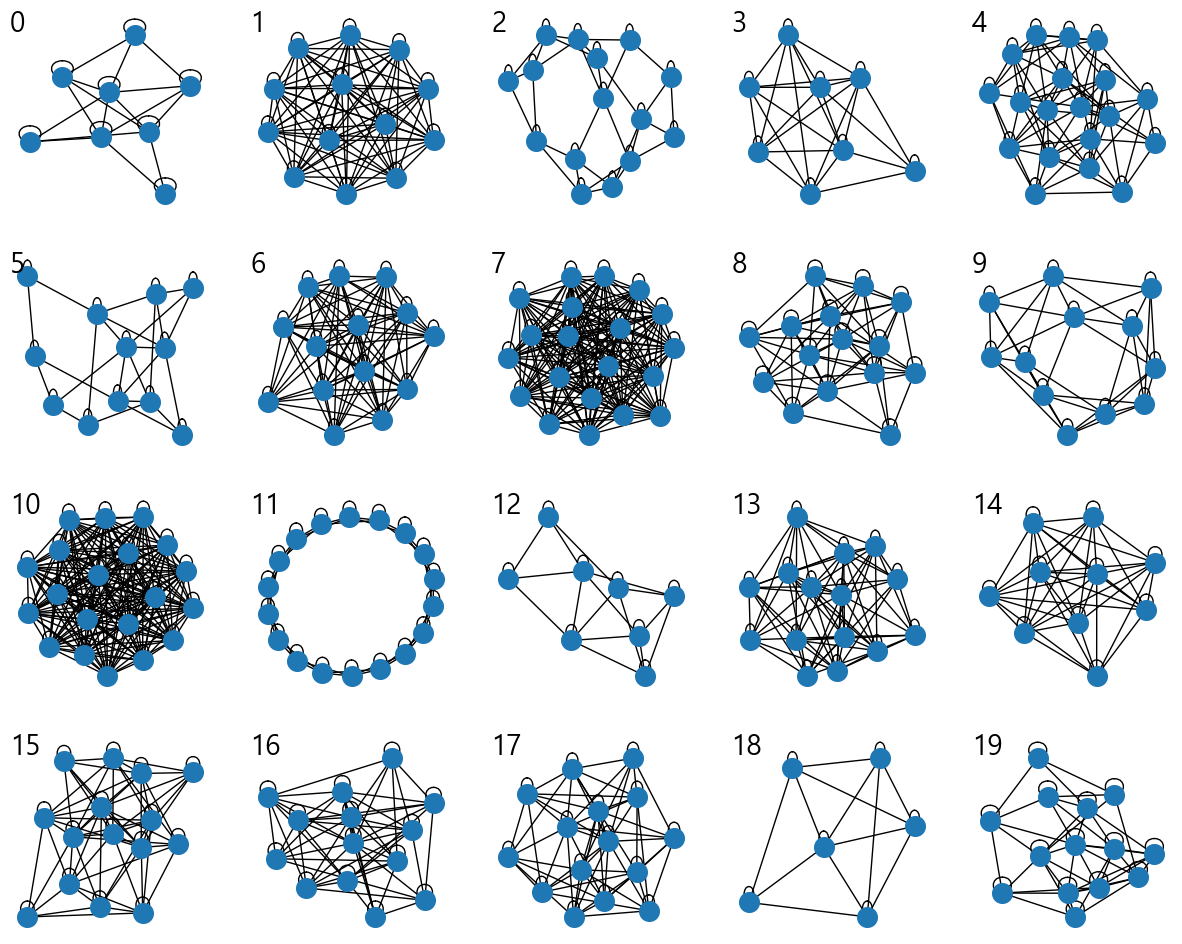

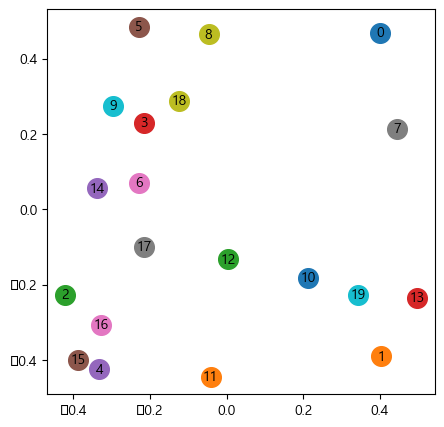

In [12]:
import random
from karateclub import Graph2Vec
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")


def generate_watts_strogatz_graph():  # Watts-Strogatz 그래프 랜덤 생성
    n = random.randint(5, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n, k, p)


Gs = [generate_watts_strogatz_graph() for i in range(20)]
encoder = Graph2Vec(dimensions=2)  # 2차원 그래프 임베딩(Graph-level embedding) 알고리즘
encoder.fit(Gs)
graph_embedding = encoder.get_embedding()

fig, subs = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))  # Watts-Strogatz 그래프 시각화
for i, (G, sub) in enumerate(zip(Gs, subs.flatten())):
    nx.draw(G, node_size=200, ax=sub)  # 그래프 시각화
    sub.text(sub.get_xlim()[0], sub.get_ylim()[-1], i, ha="left", va="top", fontsize=20)
plt.show()

fig, sub = plt.subplots(figsize=(5, 5))  # 그래프 투 벡터 임베딩 결과 시각화
for i, V in enumerate(graph_embedding):
    v0, v1 = V[0], V[1]
    sub.scatter(v0, v1, s=200)
    sub.annotate(str(i), (v0, v1), fontsize=10, ha="center", va="center")
plt.show()

---